In [1]:
#Overall goal of this pipeline is to take in a barcodes txt file, a gene txt file and a matrix file generated from Kallisto and Bustools as seen in a previous
#tutorial, and output PCAs, tSNEs and various other types of analyses to develop a low dimensional representation of the data.
#The first problem was that the gene txt file had a random numbering system using unclear GIDs. However, this was resolved by switching the unclear GIDs to the 
#standardized gene code IDs.
#Currently, the gene column data has multiple columns that state the exact same thing, so we want to merge these columns together. However, due to the sheer size
#of the matrix, we must first filter out the unimportant data. This will be done by getting rid of barcode rows that have a sum less than 3.

In [2]:
#Steps to this pipeline
#1. Rename GIDs to standardized gene names
#2. Filter out gene barcode rows that have a sum less than 3

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import scipy as scp
import numpy.ma as ma

In [4]:
folderWithFiles='/media/kush/2TB HDD A/kallisto_bustools_getting_started/bus_output_07/spliced'

In [5]:
output_file=open('/media/kush/2TB HDD A/kallisto_bustools_getting_started/bus_output_07/spliced/remake.genes.txt','w')

In [6]:
data=pd.read_csv('/media/kush/2TB HDD A/kallisto_bustools_getting_started/cDNA_introns.t2g.txt',sep='\t',header=None)

In [7]:
data.columns=["Number","GID","Gene Code"]

In [8]:
data.drop_duplicates(subset ="GID", keep = "first", inplace = True) 

In [9]:
geneCodeData=data["Gene Code"]

In [10]:
dataList=list(geneCodeData)

In [11]:
for i in dataList:
    output_file.write(i+"\n")

In [12]:
output_file.close()

In [13]:
matrix=sc.read_mtx(folderWithFiles+'/s.mtx')

In [14]:
barcodes=pd.read_csv(folderWithFiles+'/s.barcodes.txt',header=None)

In [15]:
genes=pd.read_csv(folderWithFiles+'/remake.genes.txt',header=None)

In [16]:
matrix.obs.index = barcodes[0].values

In [17]:
matrix.var.index = genes[0].values

In [18]:
dfMatrix=matrix.to_df()

In [19]:
dfMatrix

,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4G4P,OR4G11P,OR4F5,AL627309,...,AC023491,AC023491,RF01518,RNA5-8SN2,RF01518,RNA5-8SN2,AC007325,AC007325,AC007325,AC007325
AAACCTGAGAAACCTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAAACGAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAAACGCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAACAATC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAAGGTGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCTTGTATC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTTGTTTG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTTTACAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTTTACGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
npMatrix=dfMatrix.to_numpy()

In [21]:
npMatrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
type(npMatrix)

numpy.ndarray

In [23]:
#Below shows a finalized version of the filtering, it turns out that the boolean mask array can just be directly indexed into the pandas dataframe and it just
#works itself out perfectly

In [24]:
npMatrixFirstPassBool=np.sum(npMatrix,axis=1)>3

In [25]:
npMatrixFirstPassBool

array([False, False, False, ..., False, False,  True])

In [26]:
npMatrixFirstPassBool.shape

(299566,)

In [27]:
dfMatrixFirstPass=dfMatrix[npMatrixFirstPassBool]

In [28]:
dfMatrixFirstPass

,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4G4P,OR4G11P,OR4F5,AL627309,...,AC023491,AC023491,RF01518,RNA5-8SN2,RF01518,RNA5-8SN2,AC007325,AC007325,AC007325,AC007325
AAACCTGAGACGCTTT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGACTAGGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGACTGTAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAGATGAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAGGGATA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCTGGTGTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTTAACCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTTAGAGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTTCGGTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
npMatrixFirstPass=dfMatrixFirstPass.to_numpy()

In [30]:
npMatrixSecondPassBool=np.sum(npMatrixFirstPass,axis=0)>0

In [31]:
npMatrixSecondPassBool

array([ True, False, False, ..., False,  True,  True])

In [32]:
dfMatrixFirstPass

,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4G4P,OR4G11P,OR4F5,AL627309,...,AC023491,AC023491,RF01518,RNA5-8SN2,RF01518,RNA5-8SN2,AC007325,AC007325,AC007325,AC007325
AAACCTGAGACGCTTT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGACTAGGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGACTGTAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAGATGAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAGGGATA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCTGGTGTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTTAACCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTTAGAGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTTCGGTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
npMatrixSecondPassBool

array([ True, False, False, ..., False,  True,  True])

In [34]:
dfMatrixSecondPass=dfMatrixFirstPass.loc[:, npMatrixSecondPassBool]

In [35]:
dfMatrixSecondPass

,DDX11L1,CICP27,AL627309,AL627309,FO538757,AP006222,AL732372,AL669831,AL669831,AL669831,...,GSTT1,AP000351,NDUFA6-DT,NDUFA6,AC240274,AC004556,BX004987,AC136352,AC007325,AC007325
AAACCTGAGACGCTTT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGACTAGGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGACTGTAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAGATGAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAGGGATA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCTGGTGTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTTAACCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTTAGAGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTTCGGTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#Below we want to try and merge like columns together, this is a subset to test the code

In [37]:
subsetDfMatrixFiltered=dfMatrixSecondPass['AC007325']

In [38]:
subsetDfMatrixFiltered

,AC007325,AC007325
AAACCTGAGACGCTTT,0.0,0.0
AAACCTGAGACTAGGC,0.0,0.0
AAACCTGAGACTGTAA,0.0,0.0
AAACCTGAGAGATGAG,0.0,0.0
AAACCTGAGAGGGATA,0.0,0.0
...,...,...
TTTGTCATCTGGTGTA,0.0,0.0
TTTGTCATCTTAACCT,0.0,0.0
TTTGTCATCTTAGAGC,0.0,0.0
TTTGTCATCTTCGGTC,0.0,0.0


In [39]:
subsetDfMatrixFiltered.groupby(lambda x:x, axis=1).sum()

,AC007325
AAACCTGAGACGCTTT,0.0
AAACCTGAGACTAGGC,0.0
AAACCTGAGACTGTAA,0.0
AAACCTGAGAGATGAG,0.0
AAACCTGAGAGGGATA,0.0
...,...
TTTGTCATCTGGTGTA,0.0
TTTGTCATCTTAACCT,0.0
TTTGTCATCTTAGAGC,0.0
TTTGTCATCTTCGGTC,0.0


In [40]:
#Now, we try and do it with everything

In [41]:
dfMatrixFinal=dfMatrixSecondPass.groupby(lambda x:x,axis=1).sum()

In [42]:
dfMatrixFinal['AC007325']

AAACCTGAGACGCTTT    0.0
AAACCTGAGACTAGGC    0.0
AAACCTGAGACTGTAA    0.0
AAACCTGAGAGATGAG    0.0
AAACCTGAGAGGGATA    0.0
                   ... 
TTTGTCATCTGGTGTA    0.0
TTTGTCATCTTAACCT    0.0
TTTGTCATCTTAGAGC    0.0
TTTGTCATCTTCGGTC    0.0
TTTGTCATCTTTAGTC    0.0
Name: AC007325, Length: 81055, dtype: float32

In [43]:
dfMatrixFinal

,A1BG,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,AAAS,AACS,AACSP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZZEF1
AAACCTGAGACGCTTT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGACTAGGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGACTGTAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAGATGAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAGGGATA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCTGGTGTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTTAACCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTTAGAGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTTCGGTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#Below, we are doing all of the needed cluster analyses

In [45]:
refinedAnndata=sc.AnnData(dfMatrixFinal)

In [46]:
print(type(refinedAnndata))

<class 'anndata.core.anndata.AnnData'>


In [47]:
sc.tl.pca(refinedAnndata,svd_solver='arpack')

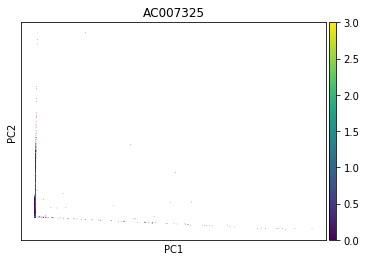

In [48]:
sc.pl.pca(refinedAnndata,color='AC007325')

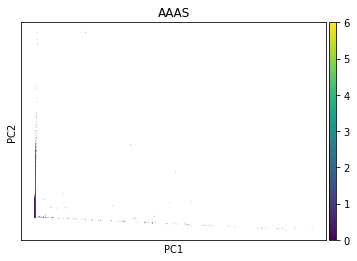

In [49]:
sc.pl.pca(refinedAnndata,color='AAAS')

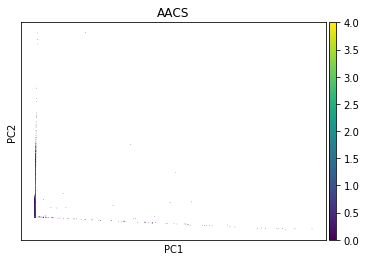

In [50]:
sc.pl.pca(refinedAnndata,color='AACS')

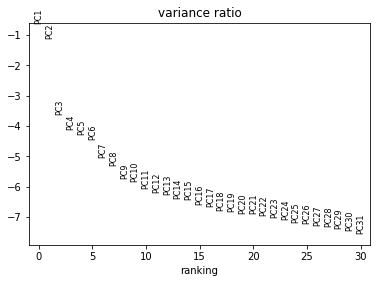

In [51]:
sc.pl.pca_variance_ratio(refinedAnndata, log=True)

In [52]:
sc.tl.pca(refinedAnndata)

In [54]:
import warnings
warnings.filterwarnings('ignore')
sc.pp.neighbors(refinedAnndata,n_neighbors=10,n_pcs=40)

In [55]:
refinedAnndata

AnnData object with n_obs × n_vars = 81055 × 22654 
    uns: 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'

In [56]:
sc.tl.umap(refinedAnndata)

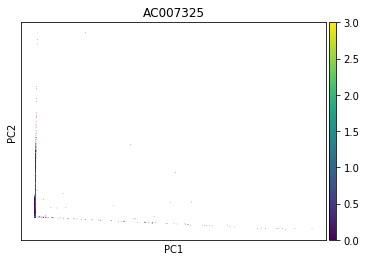

In [58]:
sc.pl.pca(refinedAnndata,color='AC007325')

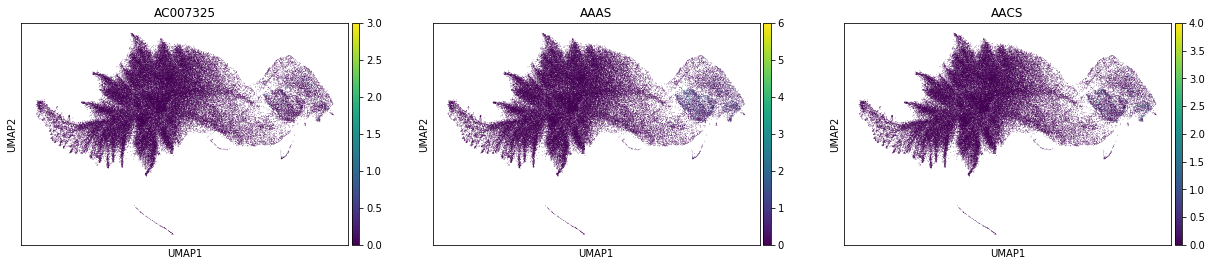

In [59]:
sc.pl.umap(refinedAnndata,color=['AC007325','AAAS','AACS'],use_raw=False)

In [60]:
sc.tl.leiden(refinedAnndata)

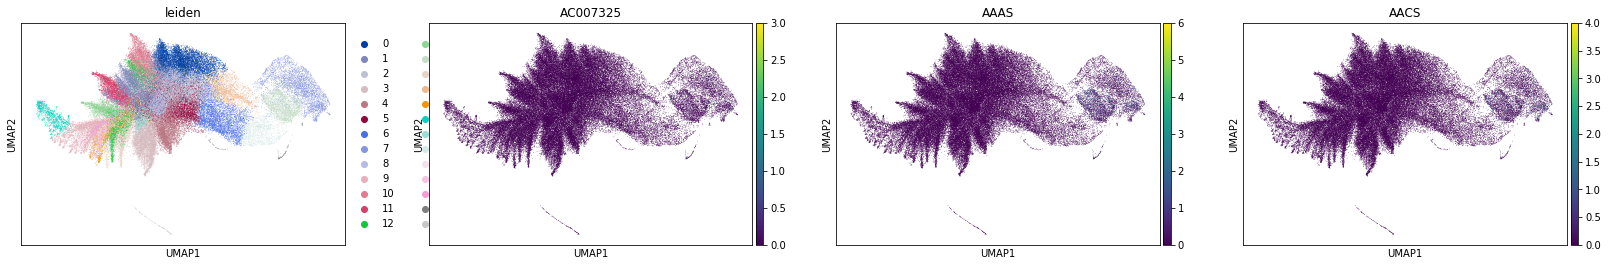

In [61]:
sc.pl.umap(refinedAnndata,color=['leiden','AC007325','AAAS','AACS'],use_raw=False)

In [62]:
sc.tl.tsne(refinedAnndata,None,None,30,12,1000,0,True,None,False)

In [66]:
sc.tl.rank_genes_groups(refinedAnndata,'leiden',True,'all','rest',100,False,None,False,'t-test','benjamini-hochberg',None)

In [67]:
refinedAnndata

AnnData object with n_obs × n_vars = 81055 × 22654 
    obs: 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'

In [68]:
results_file = '/media/kush/2TB HDD A/kallisto_bustools_getting_started/jupyter/src/write/tutorial_analysis.h5ad'

In [69]:
refinedAnndata.write(results_file)